# ECC Demonstration

Import my ECC package into the environment

In [1]:
from ECC import *

### Key Generation
Declare the bit size we want to use

In [2]:
bitSize = 17

Generate a set of ECC keys with appropriate bitsize

In [3]:
ECC_keys = generate_ECC.KeyGen(bitSize, True, True)     # initalise object True sets verbose and demo flag on KeyGen
ECC_keys.generateCurve()                                # create a curve
ECC_keys.generateKeys()                                 # runs generator

Generating  17 bit prime... 
10 rounds of Miller-Rabin needed (according to FISC)
Trial-Division prime list generated, size:  54
New candidate... 91745
New candidate... 100797
New candidate... 106499
New candidate... 91969
Prime of  17 bits found: 91969
Checked 4 candidates in 0.02 s

Checking: y^2 = x^3 + 9x + 7 % 91969

y^2 = x^3 + 9x + 7 % 91969
Generating  17 bit prime... 
10 rounds of Miller-Rabin needed (according to FISC)
Trial-Division prime list generated, size:  54
New candidate... 90591
New candidate... 102297
New candidate... 78033
New candidate... 121581
New candidate... 73187
New candidate... 117209
Prime of  17 bits found: 117209
Checked 6 candidates in 0.01 s

Checking: y^2 = x^3 + 7x + 2 % 117209

y^2 = x^3 + 7x + 2 % 117209
Checked 2 curves
k = 116213  G = (78201, 96909)   Q = (4282, 115112)
Public-Key: {
    Curve: y^2 = x^3 + 7x + 2 % 117209
    Base-Point: (78201, 96909)
    Order(Base): 117741
    Public-Point: (4282, 115112)
}
Private-Key: 116213
n is 17 bits



True

### Brute Force Algorithm

Very trivial:

- Simply keep adding G to itself until we reach the required Q 
- $O(p)$ for prime $p$

In [4]:
# pass it public keys, and True verbose & demo flag
bf = brute_force.BFSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True) 
# run solver
bf.solve()                                                                

'116213.G = (4282, 115112)'

k: 116213
Time taken: 3.426 s
Space used: 4 bytes
Numbers checked: 116213


True

### Pollard's-$\lambda$ method

An extremely probabilistic method:

- Based around setting a "trap"
- Which a "wild kangaroo" falls into
- The distance travelled before falling into the trap helps is calculate $k$
- Theoretically grows wit $O(\sqrt{p})$
- Often fails with the "wild kangaroo" entering a cycle in a safe zone

In [5]:
# pass it public keys, and True verbose & demo flag
lamb = pollard_lambda.PLSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True) 
# run solver
lamb.solve()  

'Trap: (78201, 96909) Wild: (78201, 96909)'

k: 116213
Time taken: 0.228 s
Space used: 80 bytes
Numbers checked: 1025


True

### Make it a bit harder

In [6]:
bitSize = 26

ECC_keys = generate_ECC.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
ECC_keys.generateCurve()                          # create a curve
ECC_keys.generateKeys()                           # runs generator

Prime of  26 bits found: 48800821
Checked 10 candidates in 0.01 s

y^2 = x^3 + 9x + 7 % 48800821
Checked 1 curves
k = 40378014  G = (45692157, 9536010)   Q = (42896506, 33779202)
Public-Key: {
    Curve: y^2 = x^3 + 9x + 7 % 48800821
    Base-Point: (45692157, 9536010)
    Order(Base): 48811471
    Public-Point: (42896506, 33779202)
}
Private-Key: 40378014
n is 26 bits



True

### Baby Step - Giant Step Algorithm

This algorithm is essentialyl brute-force, trading space for time:

- We compute a hash table of results upto $s \leftarrow \sqrt{ord(G)}$
- Giant steps incremet $i$ calculating: $P \leftarrow Q - G.(i*s)$
- When $P$ is found in the hash table we calculate $k \leftarrow hash(P) + i*s$
- $O(\sqrt{p})$ for space and time complexity

In [7]:
# pass it public keys, and True verbose & demo flag
bsgs = baby_step.BGSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True)    
# run solver
bsgs.solve()                                                              

'(42896506, 33779202) - (45692157, 9536010) * 40377873 = (10482692, 11187616)'

k: 40378014
Time taken: 3.097 s
Space used: 55904 bytes
Numbers checked: 12768


True

### Pohlig-Hellman

A "special purpose" algorithm:

- If $ord(G)$ is a "smoooth number" we can decompose the problem 
- Making new sub-problems over each of the prime factors
- Then recombine the solutions using the CRT
- It's time complexity grows with the square root of the largest prime factor of $ord(G)$.
- So worst case is $O(\sqrt{p})$ where $ord(G) \equiv p$

In [8]:
# pass it public keys, and True verbose & demo flag
ph = pohlig_hellman.PHSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True) 
# run solver
ph.solve()  

{17: 1, 659: 1, 4357: 1}
17^1: G'=(30417447, 9422730) Q'=(35646582, 40245245); ord = 17
659^1: G'=(7976615, 32580535) Q'=(12736686, 28754677); ord = 659
4357^1: G'=(15215002, 39500999) Q'=(23817113, 4446234); ord = 4357
k: 40378014
Time taken: 0.012 s
Space used: 139
Numbers checked: 145


True

### Pollard's-$\rho$ method

Same as for the IFP:

- We aim to find two sets of numbers such that $a.G + b.Q = a'.G + b'.Q$, which rearranges to give us: $k \leftarrow \frac{a-a'}{b'-b} \; mod \; ord(G)$
- Found by generating a repeatable random sequence of points, which according to the birthday paradox must eventually cycle
- Send two runners around one twice as fast as the other to detect cycle 
- $O(\sqrt{p})$ according to birthday paradox
- But each "check" is only an addition not multiplication, so much faster

In [9]:
# pass it public keys, and True verbose & demo flag
rho = pollard_rho.PRSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True)   
# run solver
rho.solve()                                                                

'X: (9793336, 42131749) Y: (9793336, 42131749)'

k: 40378014
Time taken: 0.546 s
Space used: 72 bytes
Numbers checked: 4655


True

### MOV Attack

Maps the ECDLP to the DLP:

- Works for a very small number of curves, which have a small embedding degree
- $\epsilon$, where $\epsilon$ is the lowest integer satisfying $p^{\epsilon} - 1 / card(E) \in N$ ($p$ is prime, $E$ is a curve over ${\bf F}_p$ and $card(E)$ is the number of points on the curve)
- Extremely efficient (subexponential) if it works
- But works for exponentially increasing amount of numbers 

In [10]:
from IPython.display import display, clear_output

solved = False
bitSize = 12

while not solved:
    clear_output(wait=True)
    
    ECC_keys = generate_ECC.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
    ECC_keys.generateCurve()                          # create a curve
    ECC_keys.generateKeys()                           # runs generator

    # pass it public keys, and True verbose & demo flag
    mov = mov_attack.MOVSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True) 
    # run solver
    mov.solve()  
    
    solved = mov.k == ECC_keys.k

Prime of  12 bits found: 2083
Checked 2 candidates in 0.11 s

y^2 = x^3 + 8x % 2083
Checked 1 curves
k = 707  G = (1486, 637)   Q = (779, 1923)
Public-Key: {
    Curve: y^2 = x^3 + 8x % 2083
    Base-Point: (1486, 637)
    Order(Base): 1042
    Public-Point: (779, 1923)
}
Private-Key: 707
n is 12 bits

1193*a + 984 330*a + 1192 2084
k: 707
Time taken: 0.003 s
Space used: 33124 bytes
Numbers checked: 91


### Basic Analysis
Running the above algorithms on a variety of random inputs to create graphs showing general trends.

The below style code makes the format of the graphs nicer

In [11]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

Runs each algorithm in a thread and plots the results.

<IPython.core.display.Javascript object>


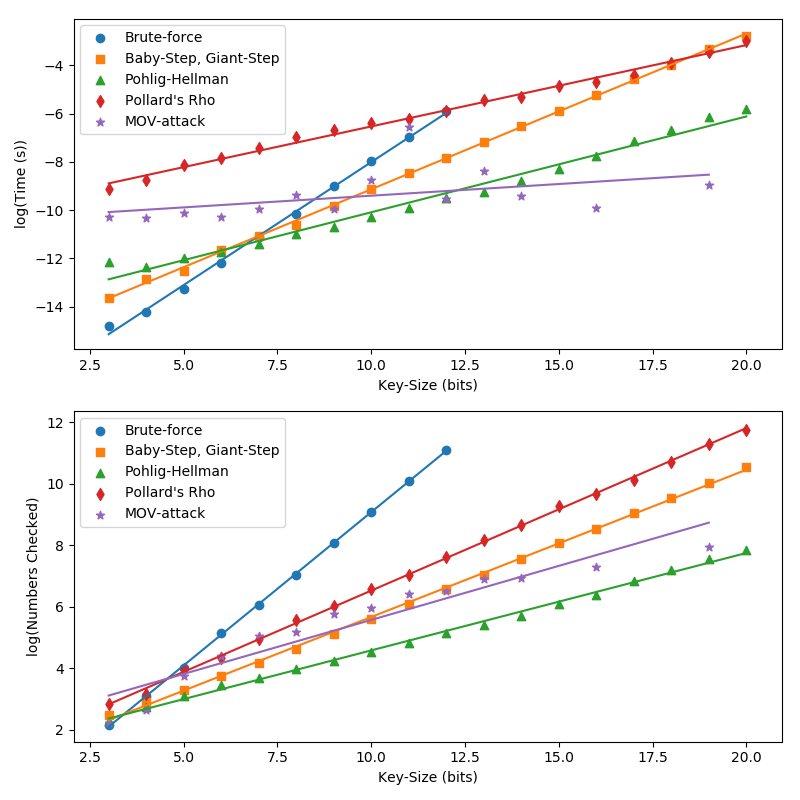

Press Enter to stop.


In [12]:
%matplotlib notebook
from graphs_ECC import *

minBit = 3
bf_bit = 13
bsgs_bit = 21
ph_bit = 21
rho_bit = 21
mov_bit = 21

testGraphs(minBit, bf_bit, bsgs_bit, ph_bit, rho_bit, mov_bit)

<img src="imgs/ECC.png" alt="drawing" style="width:80%;"/>